# Power Line Dataset InsPLAD


In [1]:
import os

# Check what's inside the dataset
for root, dirs, files in os.walk("..", topdown=True):
    print(f"\n{root}")
    for name in files[:5]:  # limit file output for readability
        print(f" - {name}")


.
 - .DS_Store
 - requirements.txt
 - README.md
 - sample.ipynb

./models

./data
 - .DS_Store

./data/InsPLAD-det
 - .DS_Store

./data/InsPLAD-det/annotations
 - instances_train.json
 - instances_val.json

./data/InsPLAD-det/train
 - 270-1_DJI_0075.jpg
 - 328-1_DJI_0185.jpg
 - 326-1_DJI_0034.jpg
 - 316-2_DJI_0092.jpg
 - 293-3_DJI_0453.jpg

./data/InsPLAD-det/val
 - 306-2_DJI_0395.jpg
 - 241-1_DJI_0632.jpg
 - 267-2_DJI_0423.jpg
 - 241-1_DJI_0626.jpg
 - 306-2_DJI_0381.jpg

./data/InsPLAD-fault
 - .DS_Store

./data/InsPLAD-fault/defect_supervised

./data/InsPLAD-fault/defect_supervised/polymer-insulator-upper-shackle

./data/InsPLAD-fault/defect_supervised/polymer-insulator-upper-shackle/annotations
 - image_list_val.txt

./data/InsPLAD-fault/defect_supervised/polymer-insulator-upper-shackle/train

./data/InsPLAD-fault/defect_supervised/polymer-insulator-upper-shackle/train/normal
 - Fotos 07-12-2020_DJI_0179_manilha_isolador_superior_499.jpg
 - Fotos 03-12-2020_DJI_0381_manilha_isolado

Found 7935 images.


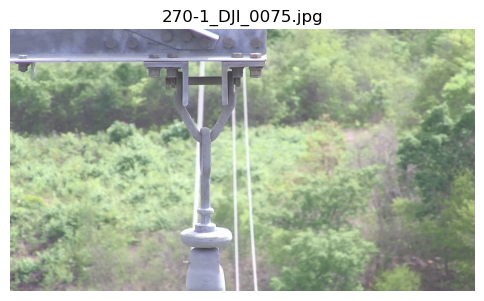

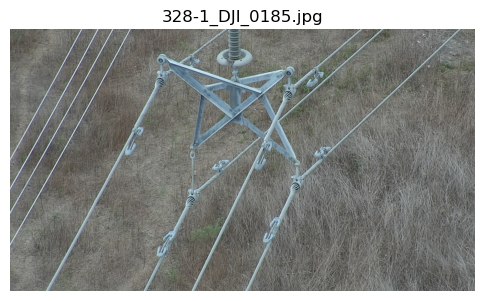

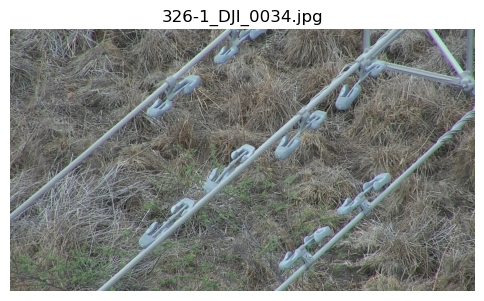

In [8]:
import matplotlib.pyplot as plt
import cv2
import glob

# Load sample val
image_paths = glob.glob('data/InsPLAD-det/train/images/*.jpg')  # Adjust if subfolder name differs
print(f"Found {len(image_paths)} val.")

# Show a few val
for i in range(3):
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(os.path.basename(image_paths[i]))
    plt.axis('off')
    plt.show()

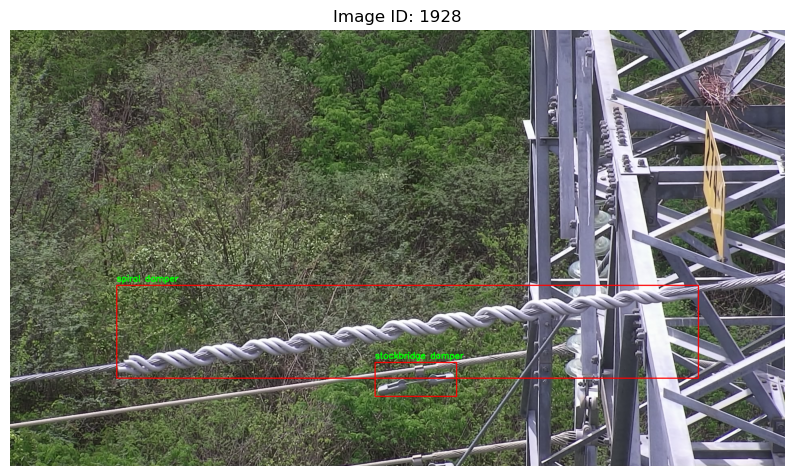

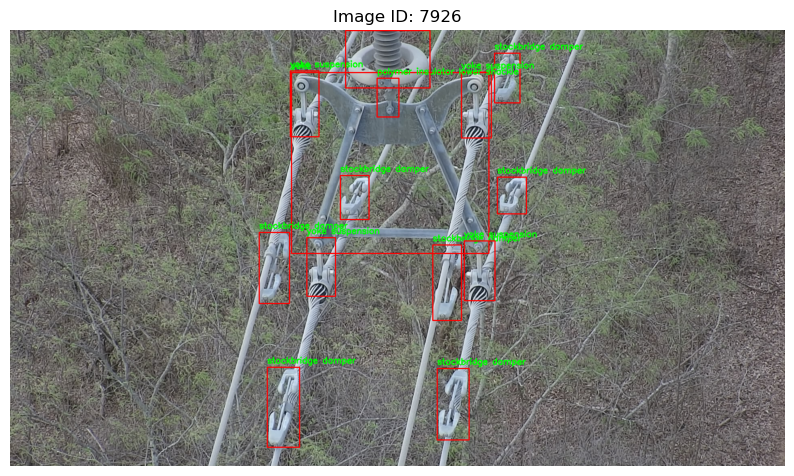

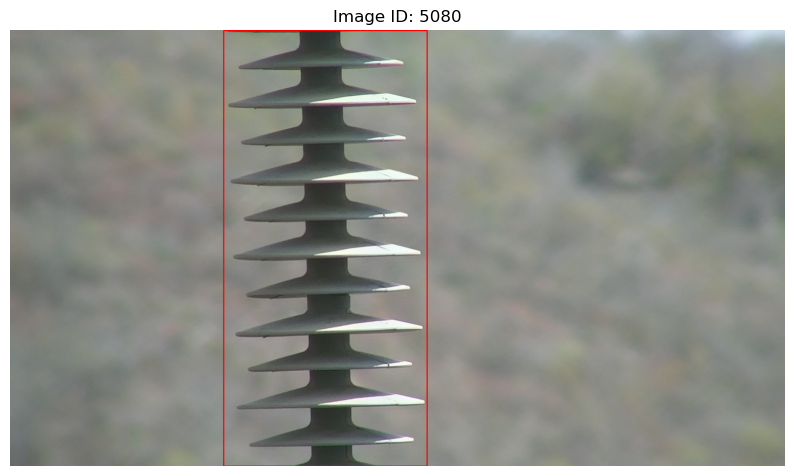

In [14]:
import json
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load COCO-format annotation file
with open("../data/InsPLAD-det/annotations/instances_train.json") as f:
    coco = json.load(f)

# Build lookup tables
image_id_to_file = {img['id']: img['file_name'] for img in coco['val']}
category_id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}

# Group annotations by image_id
from collections import defaultdict
annotations_by_image = defaultdict(list)
for ann in coco['annotations']:
    annotations_by_image[ann['image_id']].append(ann)

# Function to visualize one image with bounding boxes
def visualize_image_with_bboxes(image_id):
    image_file = image_id_to_file[image_id]
    img_path = os.path.join("../data/InsPLAD-det/train/images", image_file)

    img = cv2.imread(img_path)
    if img is None:
        print(f"Image not found: {img_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    anns = annotations_by_image[image_id]

    for ann in anns:
        x, y, w, h = ann['bbox']
        category_id = ann['category_id']
        category_name = category_id_to_name[category_id]

        cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
        cv2.putText(img, category_name, (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"Image ID: {image_id}")
    plt.axis('off')
    plt.show()

# Visualize a random sample
for _ in range(3):
    random_image_id = random.choice(list(image_id_to_file.keys()))
    visualize_image_with_bboxes(random_image_id)